#CNN

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d asdasdasasdas/garbage-classification

 77% 63.0M/82.0M [00:00<00:00, 223MB/s]
100% 82.0M/82.0M [00:00<00:00, 230MB/s]


In [ ]:
!unzip /content/garbage-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard160.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/c

#Step 2. Exploratory Data Analysis (EDA)

In [ ]:
import os
import random
from shutil import copyfile

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/Garbage classification/Garbage classification')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/Garbage classification/Garbage classification"))
file_count = len(files)
# print(file_count)

['paper', 'trash', 'glass', 'metal', 'plastic', 'cardboard']


In [ ]:
# Make new base directory
original_dataset_dir = '/content/Garbage classification/Garbage classification'
base_dir = '/content/GARBAGE-DATASET/'
os.mkdir(base_dir)

In [ ]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)



train_trash_dir = os.path.join(train_dir, 'trash')
os.mkdir(train_trash_dir)

train_plastic_dir = os.path.join(train_dir, 'plastic')
os.mkdir(train_plastic_dir)

train_paper_dir = os.path.join(train_dir, 'paper')
os.mkdir(train_paper_dir)

train_cardboard_dir = os.path.join(train_dir, 'cardboard')
os.mkdir(train_cardboard_dir)

train_glass_dir = os.path.join(train_dir, 'glass')
os.mkdir(train_glass_dir)

train_metal_dir = os.path.join(train_dir, 'metal')
os.mkdir(train_metal_dir)


validation_trash_dir = os.path.join(validation_dir, 'trash')
os.mkdir(validation_trash_dir)

validation_plastic_dir = os.path.join(validation_dir, 'plastic')
os.mkdir(validation_plastic_dir)

validation_paper_dir = os.path.join(validation_dir, 'paper')
os.mkdir(validation_paper_dir)

validation_cardboard_dir = os.path.join(validation_dir, 'cardboard')
os.mkdir(validation_cardboard_dir)

validation_glass_dir = os.path.join(validation_dir, 'glass')
os.mkdir(validation_glass_dir)

validation_metal_dir = os.path.join(validation_dir, 'metal')
os.mkdir(validation_metal_dir)

In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [ ]:
CARBOARD_SOURCE_DIR = '/content/Garbage classification/Garbage classification/cardboard/'
TRAINING_CARBOARD_DIR = '/content/GARBAGE-DATASET/train/cardboard/'
VALID_CARBOARD_DIR = '/content/GARBAGE-DATASET/validation/cardboard/'

GLASS_SOURCE_DIR = '/content/Garbage classification/Garbage classification/glass/'
TRAINING_GLASS_DIR = '/content/GARBAGE-DATASET/train/glass/'
VALID_GLASS_DIR = '/content/GARBAGE-DATASET/validation/glass/'

METAL_SOURCE_DIR = '/content/Garbage classification/Garbage classification/metal/'
TRAINING_METAL_DIR = '/content/GARBAGE-DATASET/train/metal/'
VALID_METAL_DIR = '/content/GARBAGE-DATASET/validation/metal/'

PAPER_SOURCE_DIR = '/content/Garbage classification/Garbage classification/paper/'
TRAINING_PAPER_DIR = '/content/GARBAGE-DATASET/train/paper/'
VALID_PAPER_DIR = '/content/GARBAGE-DATASET/validation/paper/'

PLASTIC_SOURCE_DIR = '/content/Garbage classification/Garbage classification/plastic/'
TRAINING_PLASTIC_DIR = '/content/GARBAGE-DATASET/train/plastic/'
VALID_PLASTIC_DIR = '/content/GARBAGE-DATASET/validation/plastic/'

TRASH_SOURCE_DIR = '/content/Garbage classification/Garbage classification/trash/'
TRAINING_TRASH_DIR = '/content/GARBAGE-DATASET/train/trash/'
VALID_TRASH_DIR = '/content/GARBAGE-DATASET/validation/trash/'

In [ ]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(CARBOARD_SOURCE_DIR, TRAINING_CARBOARD_DIR, VALID_CARBOARD_DIR, split_size)
split_data(GLASS_SOURCE_DIR, TRAINING_GLASS_DIR, VALID_GLASS_DIR, split_size)
split_data(METAL_SOURCE_DIR, TRAINING_METAL_DIR, VALID_METAL_DIR, split_size)
split_data(PAPER_SOURCE_DIR, TRAINING_PAPER_DIR, VALID_PAPER_DIR, split_size)
split_data(PLASTIC_SOURCE_DIR, TRAINING_PLASTIC_DIR, VALID_PLASTIC_DIR, split_size)
split_data(TRASH_SOURCE_DIR, TRAINING_TRASH_DIR, VALID_TRASH_DIR, split_size)

#Data Augmentation

In [ ]:
#import necessary libraries

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# data augmentation for training variable

train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.2,horizontal_flip=True)

In [ ]:
# data augmentation for testing variable

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# data augmentation on the training data

xtrain = train_datagen.flow_from_directory('/content/GARBAGE-DATASET/train',
                                           target_size =(64,64),
                                           class_mode = 'categorical',
                                           batch_size = 100)

Found 2144 images belonging to 6 classes.


In [ ]:
# data augmentation on the testing data
xtest = test_datagen.flow_from_directory('/content/GARBAGE-DATASET/validation',
                                           target_size =(64,64),
                                           class_mode = 'categorical',
                                           batch_size = 100)

Found 383 images belonging to 6 classes.


#CNN Model Building


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
## adding layers
model = Sequential() # Input layer
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # convolution layer
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # convolution layer
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(250,activation='relu')) # Hidden layer 2
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(250,activation='relu')) # Hidden layer 2
model.add(Dense(6,activation='softmax')) # Output layer
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
 dense_3 (Dense)             (None, 300)               8640300   
                                                                 
 dense_4 (Dense)             (None, 250)               75250     
                                                      

In [ ]:
# Compile the model

model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
# Train the model

model.fit_generator(xtrain,steps_per_epoch=len(xtrain),
                    epochs=20,validation_data=xtest,validation_steps=len(xtest))

Epoch 1/20
22/22 [==============================] - 12s 449ms/step - loss: 1.7206 - accuracy: 0.2579 - val_loss: 1.6334 - val_accuracy: 0.3499
Epoch 2/20
22/22 [==============================] - 11s 486ms/step - loss: 1.5518 - accuracy: 0.3563 - val_loss: 1.5701 - val_accuracy: 0.4334
Epoch 3/20
22/22 [==============================] - 10s 444ms/step - loss: 1.4286 - accuracy: 0.4221 - val_loss: 1.4179 - val_accuracy: 0.4360
Epoch 4/20
22/22 [==============================] - 9s 391ms/step - loss: 1.2945 - accuracy: 0.4636 - val_loss: 1.3544 - val_accuracy: 0.4700
Epoch 5/20
22/22 [==============================] - 9s 395ms/step - loss: 1.2071 - accuracy: 0.5280 - val_loss: 1.2955 - val_accuracy: 0.5222
Epoch 6/20
22/22 [==============================] - 10s 437ms/step - loss: 1.1122 - accuracy: 0.5639 - val_loss: 1.2811 - val_accuracy: 0.5274
Epoch 7/20
22/22 [==============================] - 10s 435ms/step - loss: 1.0661 - accuracy: 0.6021 - val_loss: 1.2085 - val_accuracy: 0.5483
E

In [ ]:
# Save model

model.save('garbage.h5')

!tar -zcvf garbageWeight.tgz garbage.h5

garbage.h5


#cloud

In [ ]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.9/538.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 99.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 971.7/971.7 kB 75.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 7.9 MB/s eta 0:00:00
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.13.0-py3-none-any.whl size=73917 sha256=a5a03456f682d88ab21d8a26f7178690e384

In [ ]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.7 MB/s eta 0:00:00


In [ ]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"VU1t8lH6UrM-ZX6cnjHUuUxd6kVotxtX771V0GSbrjWh"
}

In [ ]:
client = APIClient(wml_credentials)

In [ ]:
client

In [ ]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----------------------  ------------------------
ID                                    NAME                    CREATED
71f9868e-05fb-4ec3-b1d7-ed8910c19548  garbage project         2023-05-23T13:27:01.799Z
8c647ce1-21d3-4b5e-b82e-9c77f0d3c016  garbage classification  2023-05-23T04:14:43.264Z
------------------------------------  ----------------------  ------------------------


,ID,NAME,CREATED
0,71f9868e-05fb-4ec3-b1d7-ed8910c19548,garbage project,2023-05-23T13:27:01.799Z
1,8c647ce1-21d3-4b5e-b82e-9c77f0d3c016,garbage classification,2023-05-23T04:14:43.264Z


In [ ]:
space_uid = "8c647ce1-21d3-4b5e-b82e-9c77f0d3c016"
space_uid

'8c647ce1-21d3-4b5e-b82e-9c77f0d3c016'

In [ ]:
client.set.default_space(space_uid)

'SUCCESS'

In [ ]:
client.software_specifications.list()

----------------------------  ------------------------------------  ----  ------------------  --------------------------
NAME                          ID                                    TYPE  STATE               REPLACEMENT
default_py3.6                 0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  unsupported         runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10       01ce9391-1a79-5a33-94fb-2e134337f314  base  not_provided
kernel-spark3.2-scala2.12     020d69ce-7ac1-5e68-ac1a-31189867356a  base  not_provided
pytorch-onnx_1.3-py3.7-edt    069ea134-3346-5748-b513-49120e15d288  base  not_provided
tensorflow_rt23.1-py3.10      079a91e0-245f-5269-8926-3c20b28f37dc  base  not_provided
scikit-learn_0.20-py3.6       09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  unsupported         runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12    09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  unsupported
pytorch-onnx_rt22.1-py3.9     0b848dd4-e681-5599-be41-b5f6fccc6471  base  create-unsupported  pytorch-onnx_rt22

,NAME,ID,TYPE,STATE,REPLACEMENT
0,default_py3.6,0062b8c9-8b7d-44a0-a9b9-46c416adcbd9,base,unsupported,runtime-22.2-py3.10
1,autoai-ts_rt23.1-py3.10,01ce9391-1a79-5a33-94fb-2e134337f314,base,not_provided,
2,kernel-spark3.2-scala2.12,020d69ce-7ac1-5e68-ac1a-31189867356a,base,not_provided,
3,pytorch-onnx_1.3-py3.7-edt,069ea134-3346-5748-b513-49120e15d288,base,not_provided,
4,tensorflow_rt23.1-py3.10,079a91e0-245f-5269-8926-3c20b28f37dc,base,not_provided,
5,scikit-learn_0.20-py3.6,09c5a1d0-9c1e-4473-a344-eb7b665ff687,base,unsupported,runtime-22.2-py3.10
6,spark-mllib_3.0-scala_2.12,09f4cff0-90a7-5899-b9ed-1ef348aebdee,base,unsupported,
7,pytorch-onnx_rt22.1-py3.9,0b848dd4-e681-5599-be41-b5f6fccc6471,base,create-unsupported,pytorch-onnx_rt22.2-py3.10
8,ai-function_0.1-py3.6,0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda,base,unsupported,runtime-22.2-py3.10
9,shiny-r3.6,0e6e79df-875e-4f24-8ae9-62dcc2148306,base,not_provided,


In [ ]:
software_space_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_space_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [ ]:
model_details=client.repository.store_model(model='garbageWeights.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"garbage",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [ ]:
model_details

In [ ]:
model_id = client.repository.get_model_id(model_details)
model_id

In [ ]:
client.repository.download(model_id,'cnn5_ibm_animal.tgz')

#Testing the model


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

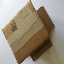

In [ ]:
# Testing 1

img = image.load_img('/content/garbage classification/Garbage classification/cardboard/cardboard146.jpg',target_size =(64,64))
img

In [ ]:
x = image.img_to_array(img) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index
op = ['cardboard','glass','metal','paper','plastic','trash']
op[pred]

1/1 [==============================] - 0s 33ms/step


'cardboard'

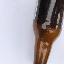

In [ ]:
# Testing 2

img_1 = image.load_img('/content/garbage classification/Garbage classification/glass/glass97.jpg',target_size =(64,64))
img_1

In [ ]:
x = image.img_to_array(img_1) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index
op = ['cardboard','glass','metal','paper','plastic','trash']
op[pred]

1/1 [==============================] - 0s 74ms/step


'glass'

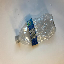

In [ ]:
# Testing 3

img_2= image.load_img('/content/garbage classification/Garbage classification/plastic/plastic96.jpg',target_size =(64,64))
img_2

In [ ]:
# Testing 3

x = image.img_to_array(img_2) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index
op = ['cardboard','glass','metal','paper','plastic','trash']
op[pred]

1/1 [==============================] - 0s 40ms/step


'plastic'

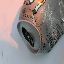

In [ ]:
# Testing 4

img_3= image.load_img('/content/GARBAGE-DATASET/validation/metal/metal123.jpg',target_size =(64,64))
img_3

In [ ]:
# Testing 4

x = image.img_to_array(img_3) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index
op = ['cardboard','glass','metal','paper','plastic','trash']
op[pred]

1/1 [==============================] - 0s 20ms/step


'metal'

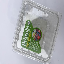

In [ ]:
# Testing 5

img_4= image.load_img('/content/GARBAGE-DATASET/validation/plastic/plastic103.jpg',target_size =(64,64))
img_4

In [ ]:
# Testing 5

x = image.img_to_array(img_4) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index
op = ['cardboard','glass','metal','paper','plastic','trash']
op[pred]

1/1 [==============================] - 0s 21ms/step


'plastic'

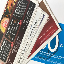

In [ ]:
# Testing 6

img_5= image.load_img('/content/GARBAGE-DATASET/validation/paper/paper100.jpg',target_size =(64,64))
img_5

In [ ]:
# Testing 6

x = image.img_to_array(img_5) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index
op = ['cardboard','glass','metal','paper','plastic','trash']
op[pred]

1/1 [==============================] - 0s 28ms/step


'paper'